# __INTRODUCTION__

Non-Newtonian fluids exhibit complex rheological behavior, where viscosity is not constant but depends on shear rate and other conditions. Among them, shear-thinning behavior, where viscosity decreases with increasing shear rate, is commonly observed in polymer solutions, gels, and biological fluids.

This project aims to apply machine learning techniques to predict the viscosity of such fluids based on input parameters like shear rate, temperature, and particle size. The shear-thinning nature is also analyzed using log-log visualization, aligning the predictions with fundamental fluid mechanics.

# __DATA PREPROCESSING__

#### Importing data

In [1]:
import pandas as pd

viscosity_df = pd.read_excel('data/viscosity_data.xlsx') 
viscosity_df.head()

,Shear Rate,Viscosity,Particle Size,Temperature
0,0.100,160000.0,100,20
1,0.120,138000.0,100,20
2,0.143,119000.0,100,20
3,0.172,103000.0,100,20
4,0.205,89444.0,100,20


In [2]:
viscosity_df.shape

(513, 4)

#### Checking for duplicates and removing if any and similar steps for null/nan/inf values

In [3]:
viscosity_df.duplicated().sum()

15

In [4]:
viscosity_df.drop_duplicates(inplace=True)

print("updated_shape_of_df: ", viscosity_df.shape)

updated_shape_of_df:  (498, 4)


In [5]:
viscosity_df.isnull().sum()

Shear Rate       0
Viscosity        0
Particle Size    0
Temperature      0
dtype: int64

In [6]:
import numpy as np
np.isinf(viscosity_df).sum()

Shear Rate       0
Viscosity        0
Particle Size    0
Temperature      0
dtype: int64

#### Looking into description of data

In [7]:
viscosity_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 512
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Shear Rate     498 non-null    float64
 1   Viscosity      498 non-null    float64
 2   Particle Size  498 non-null    int64  
 3   Temperature    498 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 19.5 KB


In [8]:
viscosity_df.describe()

,Shear Rate,Viscosity,Particle Size,Temperature
count,498.000000,498.000000,498.000000,498.000000
mean,219.482353,14574.947786,297.590361,29.879518
std,437.836192,25472.174109,162.952564,8.147628
min,0.100000,0.067272,100.000000,20.000000
25%,1.240000,1806.650000,100.000000,20.000000
50%,15.500000,5216.750000,300.000000,30.000000
75%,192.000000,15959.250000,500.000000,40.000000
max,2010.000000,189000.000000,500.000000,40.000000


# __EXPLORATORY DATA ANALYSIS__

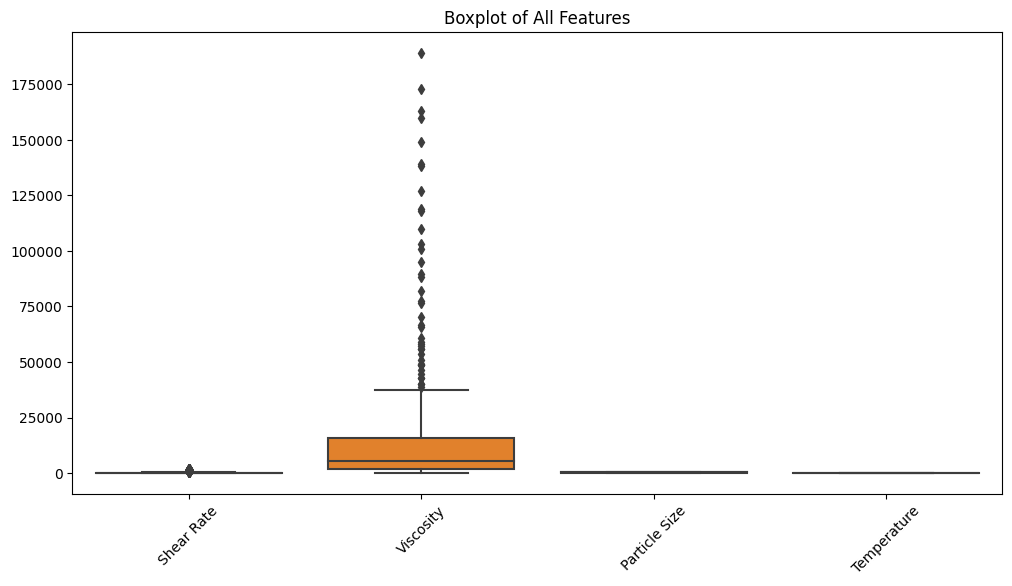

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=viscosity_df)
plt.title("Boxplot of All Features")
plt.xticks(rotation=45)
plt.show()

From this plot it can be seen that viscosity has high number of outliers, shear rate has a few and, particle size and temperature have almost none. Next we do outlier removal using IQR.

In [10]:
def remove_outliers_iqr(df, columns):
    cleaned_df = df.copy()
    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

columns_to_check = ['Shear Rate', 'Viscosity']
viscosity_df_cleaned = remove_outliers_iqr(viscosity_df, columns_to_check)

print(f"Original shape: {viscosity_df.shape}")
print(f"After outlier removal: {viscosity_df_cleaned.shape}")

Original shape: (498, 4)
After outlier removal: (389, 4)


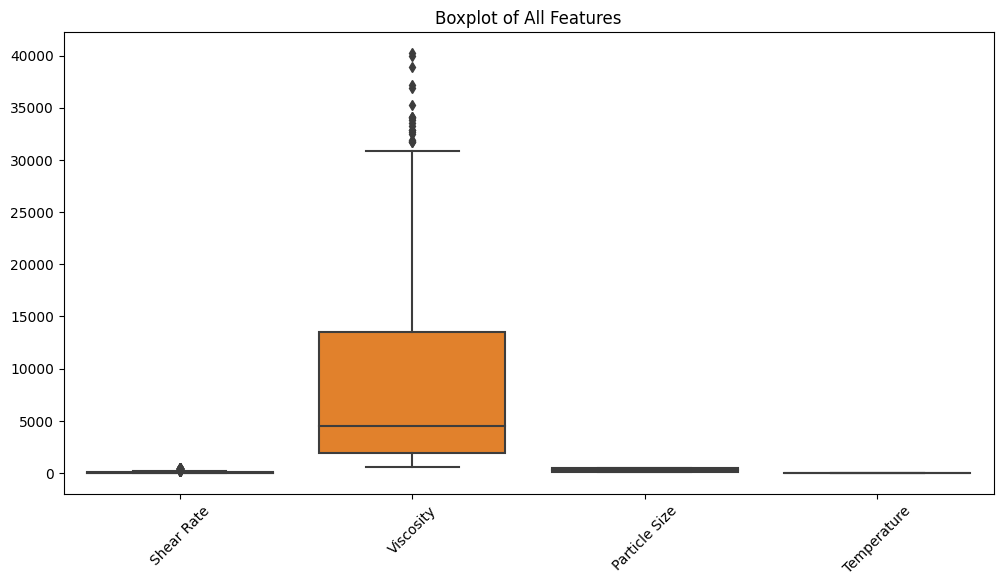

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=viscosity_df_cleaned)
plt.title("Boxplot of All Features")
plt.xticks(rotation=45)
plt.show()

#### Scaling the data and moving ahead with EDA visualisations

In [12]:
from sklearn.preprocessing import StandardScaler

X = viscosity_df_cleaned[['Shear Rate', 'Temperature', 'Particle Size']]
y = viscosity_df_cleaned['Viscosity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

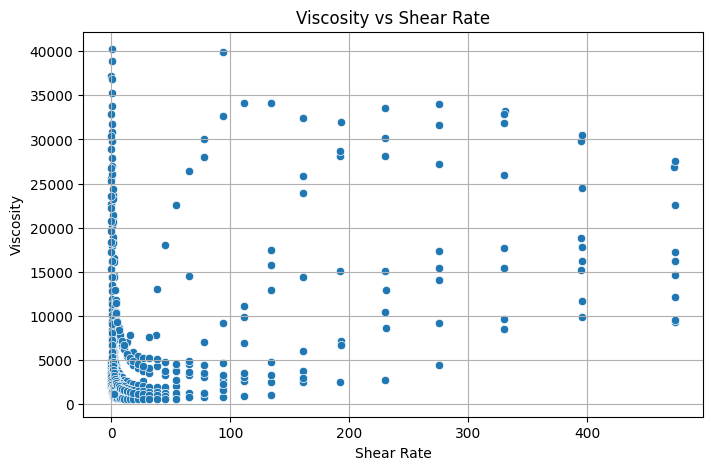

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=viscosity_df_cleaned['Shear Rate'], y=viscosity_df_cleaned['Viscosity'])
plt.title('Viscosity vs Shear Rate')
plt.xlabel('Shear Rate')
plt.ylabel('Viscosity')
plt.grid(True)
plt.show()

__Viscosity vs Shear Rate:__ Shows non-Newtonian shear-thinning behavior – viscosity decreases as shear rate increases.

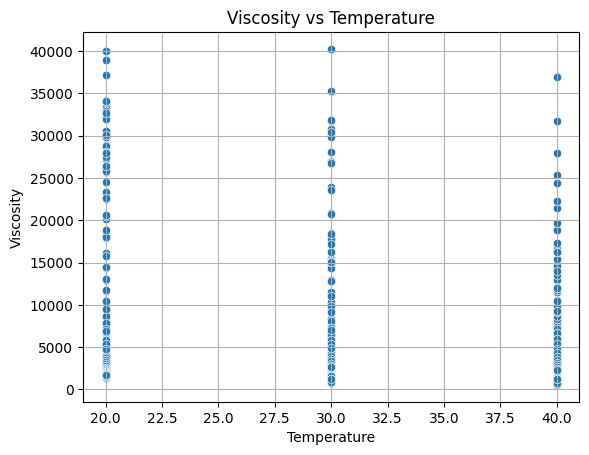

In [14]:
sns.scatterplot(x=viscosity_df_cleaned['Temperature'], y=viscosity_df_cleaned['Viscosity'])
plt.title('Viscosity vs Temperature')
plt.grid(True)
plt.show()

__Viscosity vs Temperature:__ There's a downward trend – as temperature increases, viscosity tends to decrease. That's physically expected behavior for many fluids.

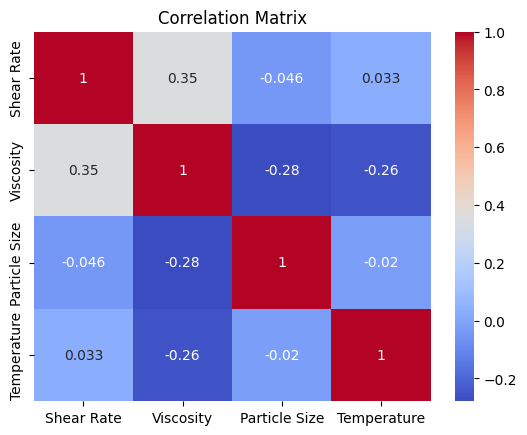

In [15]:
sns.heatmap(viscosity_df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# __MODEL TRAINING__

Splitting data into 80-20 category for train test for models

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

#### __Linear Regression Model__

In [17]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = lr_model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

RMSE: 9573.111
MAE: 7177.050
R²: 0.101


* R² = 0.101 → The model explains only ~10% of the variance. That's quite low.
  
* High RMSE/MAE-> Indicates large prediction errors, possibly due to:

         -Non-linear relationships (which Linear Regression can’t capture well)
         -Skewed or wide-ranging target values (viscosity often is)
         -Some noise or feature interaction that isn’t captured

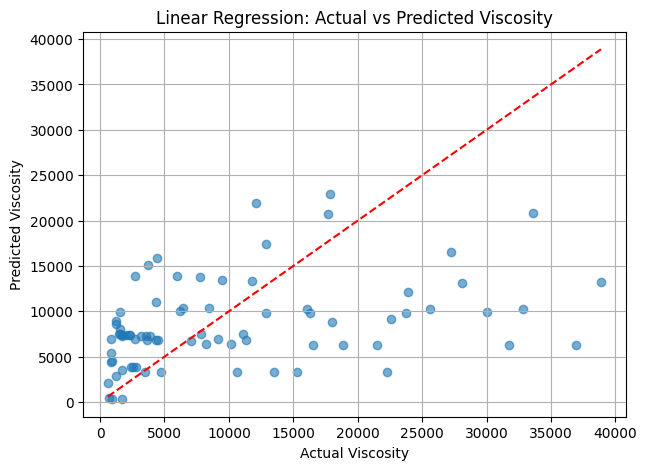

In [20]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Viscosity")
plt.ylabel("Predicted Viscosity")
plt.title("Linear Regression: Actual vs Predicted Viscosity")
plt.grid(True)
plt.show()

From the graph similar observations can be made. Next, try implementing a non-linear model.

#### __Decision Tree__

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [22]:
y_pred_tree = tree_model.predict(X_test)

In [23]:
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"RMSE: {rmse_tree:.3f}")
print(f"MAE: {mae_tree:.3f}")
print(f"R²: {r2_tree:.3f}")

RMSE: 2028.357
MAE: 1156.840
R²: 0.960


Significant increase in R2 which is good. RMSE and MAE also gave lower values than linear model but are still a bit large.

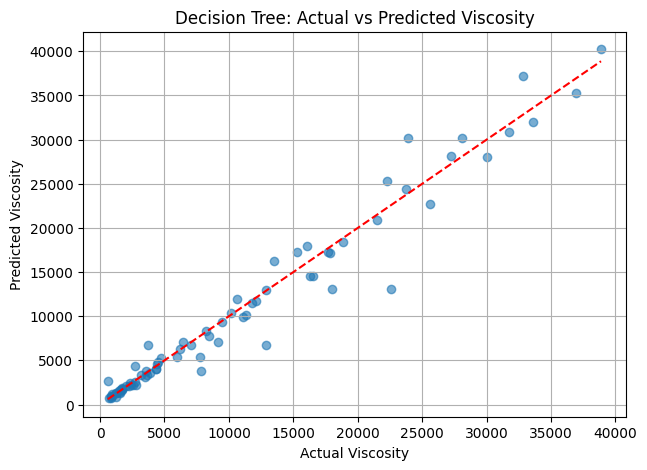

In [24]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_tree, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Viscosity")
plt.ylabel("Predicted Viscosity")
plt.title("Decision Tree: Actual vs Predicted Viscosity")
plt.grid(True)
plt.show()

The plot suggests good fit for smaller viscosity values but a deviation towards larger values so next tuning it might improve.

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [26]:
best_tree = grid_search.best_estimator_

y_pred_best_tree = best_tree.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best_tree)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best_tree)
r2_best = r2_score(y_test, y_pred_best_tree)

print("Best Parameters:", grid_search.best_params_)
print(f"RMSE: {rmse_best:.3f}")
print(f"MAE: {mae_best:.3f}")
print(f"R²: {r2_best:.3f}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
RMSE: 2024.964
MAE: 1159.854
R²: 0.960


__this shows almost same performance as initial decision tree.__

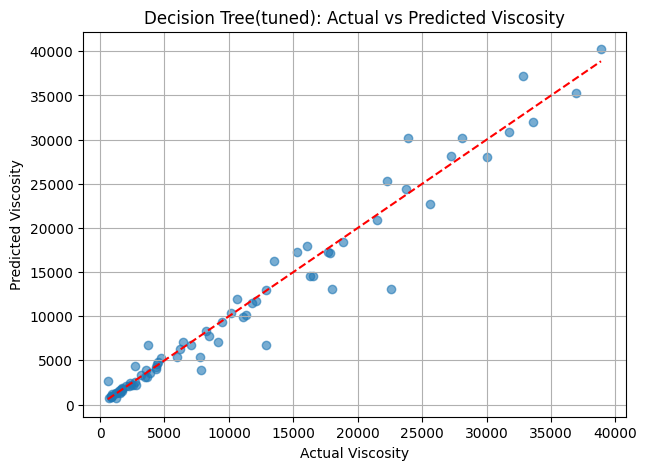

In [42]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_best_tree, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Viscosity")
plt.ylabel("Predicted Viscosity")
plt.title("Decision Tree(tuned): Actual vs Predicted Viscosity")
plt.grid(True)
plt.show()

#### Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
y_pred_rf = rf_model.predict(X_test)

In [30]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RMSE: {rmse_rf:.3f}")
print(f"MAE: {mae_rf:.3f}")
print(f"R²: {r2_rf:.3f}")

RMSE: 2666.581
MAE: 1462.681
R²: 0.930


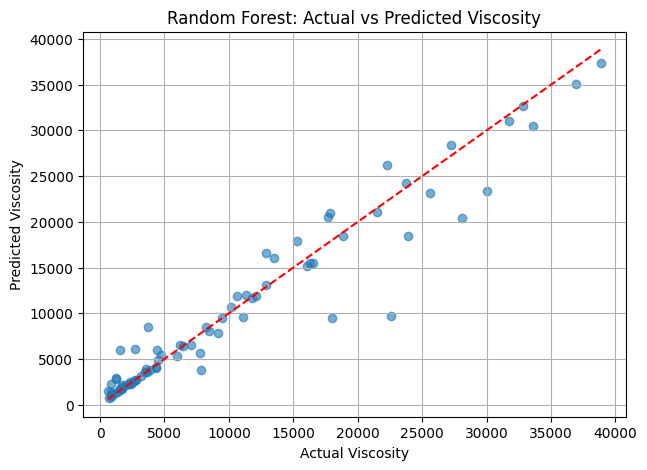

In [31]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Viscosity")
plt.ylabel("Predicted Viscosity")
plt.title("Random Forest: Actual vs Predicted Viscosity")
plt.grid(True)
plt.show()

Close results to decision tree but lesser performance.

#### LWLR

In [32]:
def weight_calculate(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * (tau ** 2)))

In [33]:
def local_weighted_regression(x0, X, Y, tau):
    x0 = np.r_[1, x0]  
    X_ = np.c_[np.ones(len(X)), X]  

    w = weight_calculate(x0[1:], X, tau)
    W = np.diag(w)  

    theta = np.linalg.pinv(X_.T @ W @ X_) @ X_.T @ W @ Y

    return x0 @ theta  

In [34]:
def apply_lwlr(X_test, X_train, y_train, tau):
    y_pred = []
    for x in X_test:
        y_pred.append(local_weighted_regression(x, X_train, y_train, tau))
    return np.array(y_pred)

In [35]:
tau = 0.02
y_pred_lwlr = apply_lwlr(X_test, X_train, y_train, tau)

tau is choosen as 0.02 by trial and error here.

In [36]:
mse_lwlr = mean_squared_error(y_test, y_pred_lwlr)
rmse_lwlr = np.sqrt(mse_lwlr)
mae_lwlr = mean_absolute_error(y_test, y_pred_lwlr)
r2_lwlr = r2_score(y_test, y_pred_lwlr)

print(f"RMSE: {rmse_lwlr:.3f}")
print(f"MAE: {mae_lwlr:.3f}")
print(f"R²: {r2_lwlr:.3f}")

RMSE: 3313.081
MAE: 2098.175
R²: 0.892


comparable results with Decision Tree and Random Forest

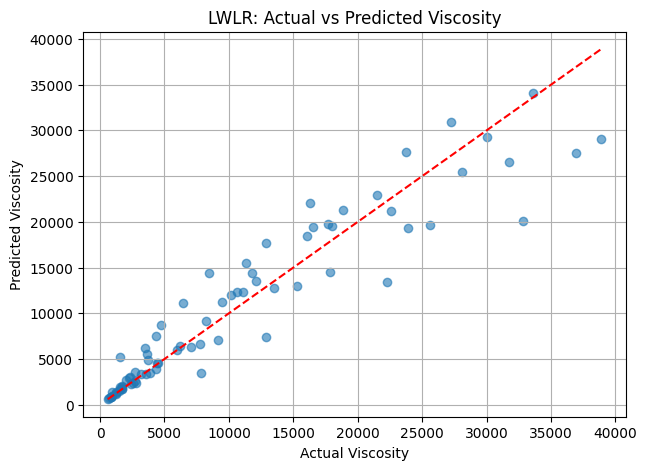

In [37]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_lwlr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Viscosity")
plt.ylabel("Predicted Viscosity")
plt.title("LWLR: Actual vs Predicted Viscosity")
plt.grid(True)
plt.show()

# __SUMMARY OF MODELS USED AND PREDICTION VALUES__

In [38]:
import pandas as pd

model_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Decision Tree (with Tuning)', 'Random Forest', 'LWLR (τ=0.02)'],
    'R²': [0.101, 0.960, 0.960 ,0.930, 0.892],
    'RMSE': [9573.11, 2028.36, 2024.964, 2666.58, 3313.08],
    'MAE': [7177.05, 1156.84, 1159.854, 1462.68, 2098.17]
})

model_results

,Model,R²,RMSE,MAE
0,Linear Regression,0.101,9573.110,7177.050
1,Decision Tree,0.960,2028.360,1156.840
2,Decision Tree (with Tuning),0.960,2024.964,1159.854
3,Random Forest,0.930,2666.580,1462.680
4,LWLR (τ=0.02),0.892,3313.080,2098.170


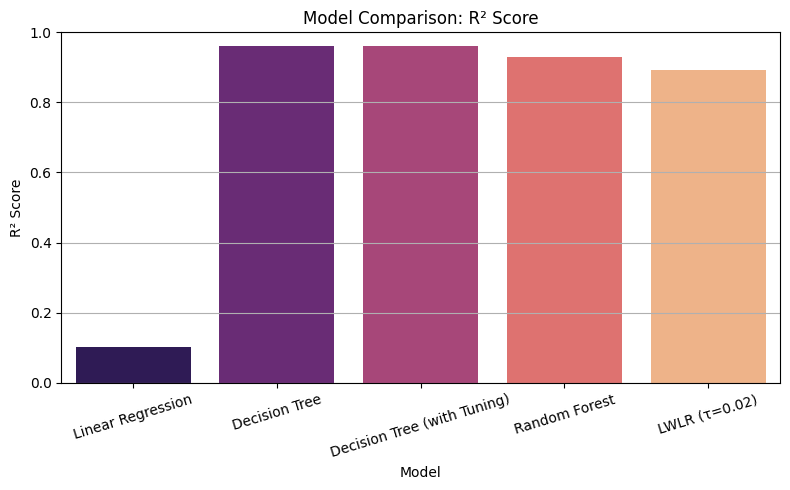

In [39]:
plt.figure(figsize=(8, 5))
sns.barplot(data=model_results, x='Model', y='R²', palette='magma')
plt.title('Model Comparison: R² Score')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=17)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

__Best performance by Decision Tree. Devaiation at higher viscosity values due to slight overfitting but mostly near.__

# __SHEAR-THINNING VISUALIZATION__

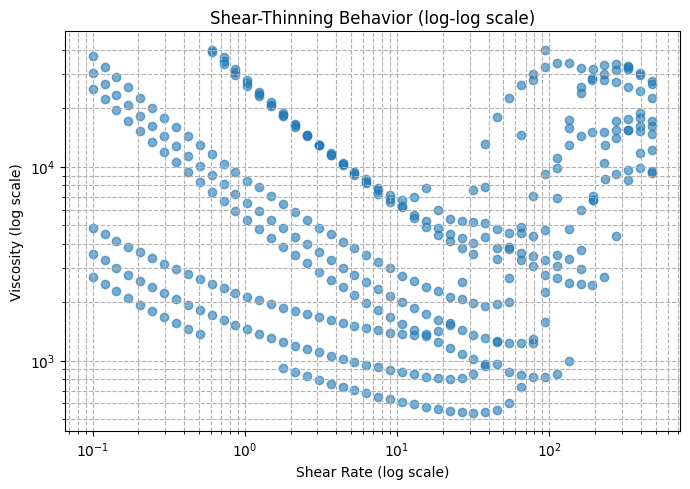

In [40]:
plt.figure(figsize=(7, 5))
plt.scatter(
    viscosity_df_cleaned['Shear Rate'],
    viscosity_df_cleaned['Viscosity'],
    alpha=0.6
)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Shear Rate (log scale)')
plt.ylabel('Viscosity (log scale)')
plt.title('Shear-Thinning Behavior (log-log scale)')
plt.grid(True, which='both', ls='--')
plt.tight_layout()
plt.show()

**The downward trend on the log-log scale confirms non-Newtonian, shear-thinning behavior. This matches theoretical behavior expected for such fluids.**

# __EXPORT__

In [41]:
import joblib

joblib.dump(best_tree, 'models/decision_tree_viscosity_model.pkl')

['models/decision_tree_viscosity_model.pkl']

**A simple Streamlit interface is for interactive prediction using the trained model.**

# __FINAL SUMMARY & INSIGHTS__

- A range of regression models were tested for predicting viscosity, including Linear Regression, Decision Tree, Random Forest, and Locally Weighted Linear Regression (LWLR).
- The **Decision Tree Regressor**, especially after basic tuning, yielded the best results with an R² of 0.96.
- Shear-thinning behavior was confirmed through log-log plotting of viscosity vs shear rate, aligning with known rheological theory.
- The final model was exported using `joblib`, and a simple deployment-ready Streamlit app was outlined for interactive prediction use cases.

This study demonstrates how machine learning can supplement chemical engineering insight to model complex fluid behavior with both accuracy and interpretability.